**Roman Schiffino**

Spring 2024

CS 251: Data Analysis and Visualization

# Lab 6a |  K-Nearest Neighbor Classifier

In this lab we will be using the library scikit-learn to train a K-Nearest Neighbor classifier and graph the results.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn import neighbors

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 1: Load and visualize dataset

- Below, load in the datasets (`file_train.csv`, `file_test.csv`). the training set has 800 samples and the test set has 200 samples.
- Create a figure with two subplots showing the train and test data side-by-side.
    - Be sure to label your subplots with informative titles (which datset are we looking at?).
    - Color-code the points based on their class.
    - Set the figure size to make everything clearly legible (not microscopic).

#### Format of data
- Column 1: x coordinate of a 2D point.
- Column 2: y coordinate of a 2D point.
- Column 3: class. Which spiral arm does the point belong to? Labels: [0, 1]

(800, 3)
(200, 3)
          x         y  class
0  2.129573  0.629904      1
1  1.888882  0.146257      1
2 -0.190357  0.383993      0
3 -0.404416  0.195282      1
4  0.373012 -0.429716      1
          x         y  class
0  0.346302  0.924858      0
1 -0.394609  0.536038      1
2  0.585625 -0.220918      1
3  0.331933 -0.482480      1
4 -0.944378  0.252697      0


TypeError: unhashable type: 'list'

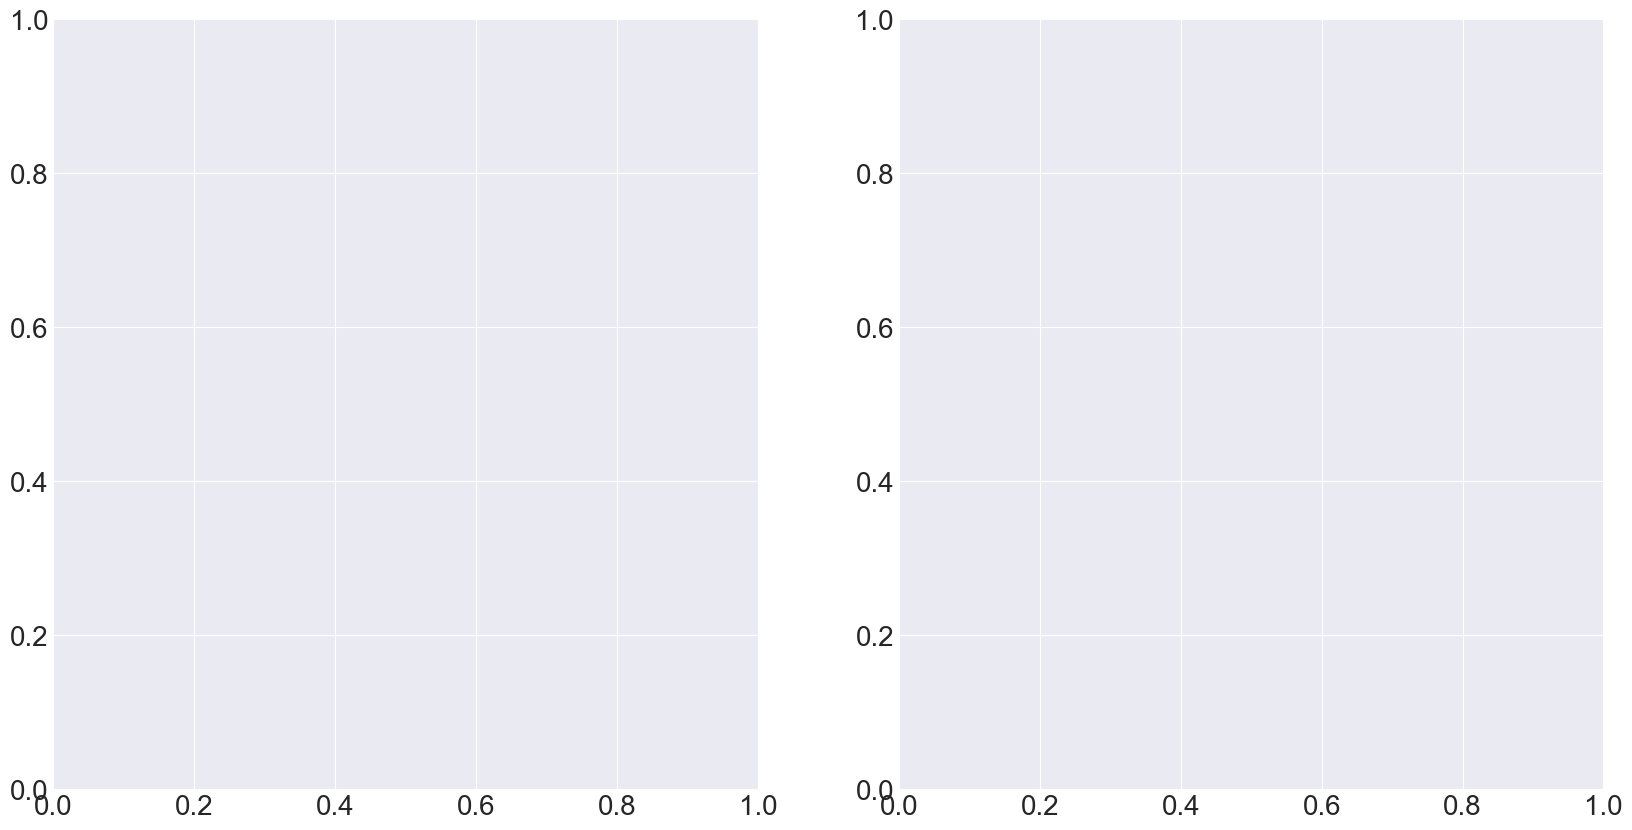

In [57]:
colors = ["#004949", "#FF6DB6", "#490092", "#B66DFF", "#B6DBFF", "#924900", "#24FF24", 
          "#009292", "#FFB6DB", "#006DDB", "#6DB6FF", "#920000", "#DB6D00", "#FFFF6D"]
# Load the datasets
train = pd.read_csv('data/file_train.csv')
test = pd.read_csv('data/file_test.csv')

### IMPORTANT: Reformatted CSV because format was wrong.

# Print the shape of the datasets
print(train.shape)
print(test.shape)

train['class'] = train['class'].astype('int')
test['class'] = test['class'].astype('int')

# Print first 5 rows of the data using head.
print(train.head())
print(test.head())

# Plot the datasets
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the training data
ax[0].scatter(train["x"], train["y"], c=list(map(lambda x: colors[x], train["class"].to_numpy())), s=30)
ax[0].set_title('Training Data')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

# Plot the testing data
ax[1].scatter(test["x"], test["y"], c=list(map(lambda x: colors[x], test["class"].to_numpy())), s=30)
ax[1].set_title('Testing Data')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
plt.show()

## Task 2: Predict dataset and graph results

1. Create a [K-Nearest Neighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) [(More Info)](https://scikit-learn.org/stable/modules/neighbors.html#classification).  Set `n_neighbors` equal to 10.
2. Use the fit method with the coordinate columns of the training dataset as X and the class column as the target.
3. Calculate the accuracy of the classifier with the test data using the score method.
4. Print the accuracy of the classifier.
    

In [32]:
# Create a KNN Classifier
knn = neighbors.KNeighborsClassifier(n_neighbors = 10)

# Fit the classifier
knn.fit(train[["x", "y"]].to_numpy(), train["class"].to_numpy())

# Calculate the accuracy
accuracy = knn.score(test[["x", "y"]].to_numpy(), test["class"].to_numpy())
print(f"Accuracy: {accuracy}")
print("Your accuracy should be 0.92")

Accuracy: 0.92
Your accuracy should be 0.92


awd

## Task 3: Visualize class boundaries

Visualize how different regions of the (2D) dataspace would be classified based on the results of the trained KNN Classifier from Task 2.

### 3a. Meshgrid

Create a meshgrid for predicting values. This is a collection of evenly spaced `(x, y)` values that sample a rectangular region of space.

1. Use [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to make an 1D ndarray of evenly spaced values, one for your x variable, one for your y variable.
   1. Set the start argument to the min value of your column -.5
   2. Set the end argument to the max value of your column +.5
   3. Set the number of samples to 300
 2. Assign `x_samples` and `y_samples` to [meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) with the evenly spaced values as the arguments for x1 and x2. Both `x_samples` and `y_samples` should have shape `(300, 300)` (i.e. the x and y values on the 2D 300x300 grid). 
    1. [Flatten](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.flatten.html)`x_samples` and `y_samples` and save into new variables.
    2. Reshape each of the flattened x_samples and y_samples to shape `(N, 1)` then [stack them](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html#numpy.hstack) to create an `(N, 2)` ndarray.

In [39]:
# Create meshgrid 
x_samples = np.linspace(train["x"].min() - .5, train["x"].max() + .5, 300)
y_samples = np.linspace(train["y"].min() - .5, train["y"].max() + .5, 300)

x_samples, y_samples = np.meshgrid(x_samples, y_samples)

# Flatten and stack
x_samples_flat = x_samples.flatten()
y_samples_flat = y_samples.flatten()
print(f"x_samples_flat.shape: {x_samples_flat.shape}")
print(f"y_samples_flat.shape: {y_samples_flat.shape}")

# Reshape and stack
x_samples_flat = x_samples_flat.reshape(-1, 1)
y_samples_flat = y_samples_flat.reshape(-1, 1)
print(f"x_samples_flat.shape: {x_samples_flat.shape}")
print(f"y_samples_flat.shape: {y_samples_flat.shape}")

# Stack
samples = np.hstack((x_samples_flat, y_samples_flat))
print(f"samples.shape: {samples.shape}")


x_samples_flat.shape: (90000,)
y_samples_flat.shape: (90000,)
x_samples_flat.shape: (90000, 1)
y_samples_flat.shape: (90000, 1)
samples.shape: (90000, 2)



### 3b. Compute KNN predictions

Use your coordinate pairs as predict inputs for the knn classifier you created in Task 2. Reshape the results to the same shape as `x_samples` `(300, 300)`. These are the KNN predictions at every (x, y) sample point on the grid.

In [42]:
# Compute KNN predictions
predictions = knn.predict(samples)
print(f"predictions.shape: {predictions.shape}")

# Reshape the predictions
predictions = predictions.reshape(x_samples.shape)

# Print the predictions
print(predictions)

predictions.shape: (90000,)
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]



### 3c. Plot the KNN predictions

In 1 plot, graph your results. The goal is to color every portion of the `x`-`y` plane within the region of possible data values one of two colors: one color if KNN predicts class 0 at (`x_samples`, `y_samples`), the other color if KNN predicts class 1. This plot resembles two paints poured out from two buckets covering every location on the `x`-`y` plane. You will then superimpose a scatterplot of the original data samples on the colored space.
    
1. Use [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) to plot a heatmap showing the KNN predictions at every point in the 2D grid. You should plug in three ndarrays and each should have shape `(300, 300)`.
2. We need to specify a colormap to have [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) color `x`-`y` plane with two colors. The problem is that none of the built-in colormaps have exactly the two colors we want, so we need to create a custom colormap. A [ListedColormap](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html) object represents a custom colormap that can be passed into the `cmap` keyword argument of pcolormesh. Create two [(example)](https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html):
     1. One should have 2 light colors [colors](https://matplotlib.org/stable/gallery/color/named_colors.html). These will be your "paint colors" for the predicted class at every (`x`, `y`) coordinate.
     2. One should have dark versions of the same 2 [colors](https://matplotlib.org/stable/gallery/color/named_colors.html). These will be your colors for the original data samples superimposed.
 3. In your [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) call, set the `cmap` to the light custom colormap that you created.
 4. Superimpose the training samples with using a scatter plot colored based on the int-coded training class labels, but for the actual colors use the dark value colormap. You will need to set both the `c` and `cmap` keyword arguments of `scatter`.
 5. Title your plot and label the axis.

light_colors: ['#004949', '#FF6DB6']
dark_colors: ['#7FA4A4', '#FFB6DA']


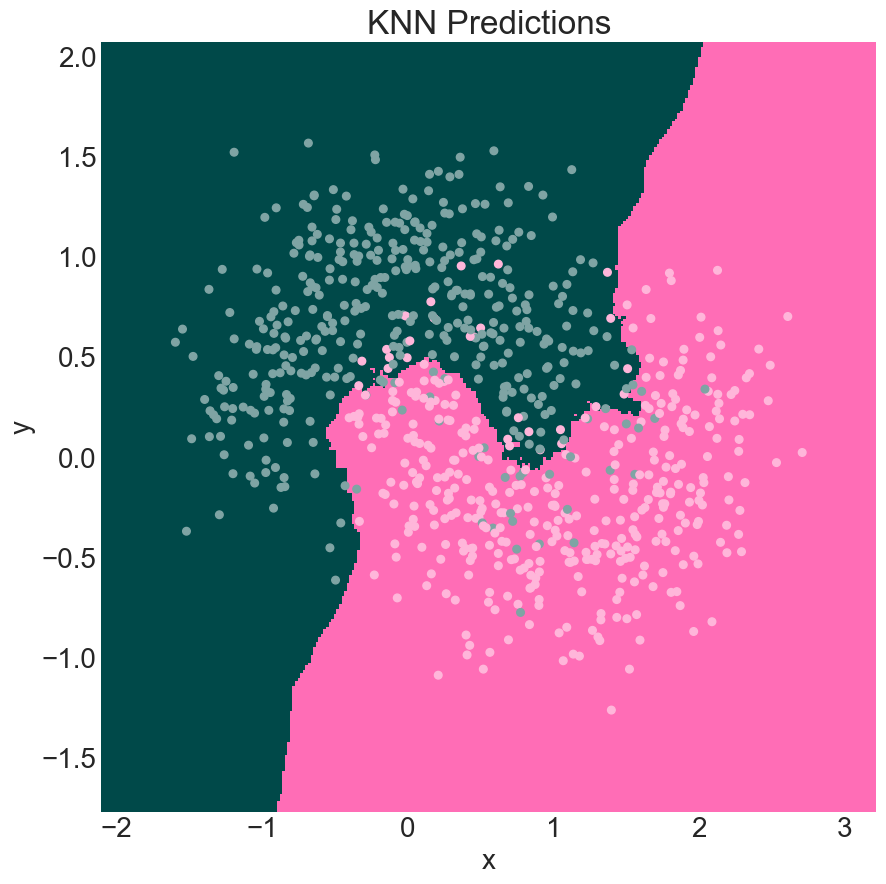

In [56]:
# Create a custom colormap
light_colors = colors[:2]
dark_colors = list(map(lambda x: "#"+"".join(map(lambda col: ("0x%0.2X" % int((255 + int(col, 16))/2))[2:], [x[1][1 + 2*i : 3 + 2*i] for i in range(3)])), enumerate(light_colors)))
custom_cmap_light = ListedColormap(light_colors)
custom_cmap_dark = ListedColormap(dark_colors)

print(f"light_colors: {light_colors}")
print(f"dark_colors: {dark_colors}")


# Plot the KNN predictions
fig2, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the KNN predictions
ax.pcolormesh(x_samples, y_samples, predictions, cmap=custom_cmap_light)

# Plot the training data
ax.scatter(train["x"], train["y"], c=train["class"], cmap=custom_cmap_dark, s=30)

# Set the title and labels
ax.set_title('KNN Predictions')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


